# Supervised Learning Project
## Domain: Banking
### Author : Abhinav Tyagi

## Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability
customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last
year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail
marketing department to devise campaigns with better target marketing to increase the success ratio with
minimal budget.

## Approach:
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age,
income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer
response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%)
accepted the personal loan that was offered to them in the earlier campaign.
We will implement Classification algorithms to differentiate people who will buy loans vs the who will not.

## Attribute Information
**ID** : Customer ID

**Age** : Customer's age in completed years

**Experience** : #years of professional experience

**Income** : Annual income of the customer (000)

**ZIP Code** : Home Address ZIP code.

**Family** : Family size of the customer

**CCAvg** : Avg. spending on credit cards per month

**Education** : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

**Mortgage** : Value of house mortgage if any. (000)

**Personal Loan** : Did this customer accept the personal 
loan offered in the last campaign

**Securities Account** : Does the customer have a securities account with the bank

**CD Account** : Does the customer have a certificate of deposit (CD) account with the
bank

**Online** : Does the customer use internet banking facilities

**Credit card** : Does the customer use a credit card issued by UniversalBank

####  Import the necessary libraries

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,f1_score,accuracy_score
from sklearn.metrics import confusion_matrix,precision_score

#### Reading Data from csv file and understanding its data

In [3]:
data=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
data.head(6)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0


In [5]:
data.shape

(5000, 14)

####  There are 5000 rows and 14 column in our dataset

There is no duplicate data present in our dataset

# 1. Read the column description and ensure you understand each attribute well


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### All the columns have 5000 non-null values.
#### Only one value is float all other are integer type.

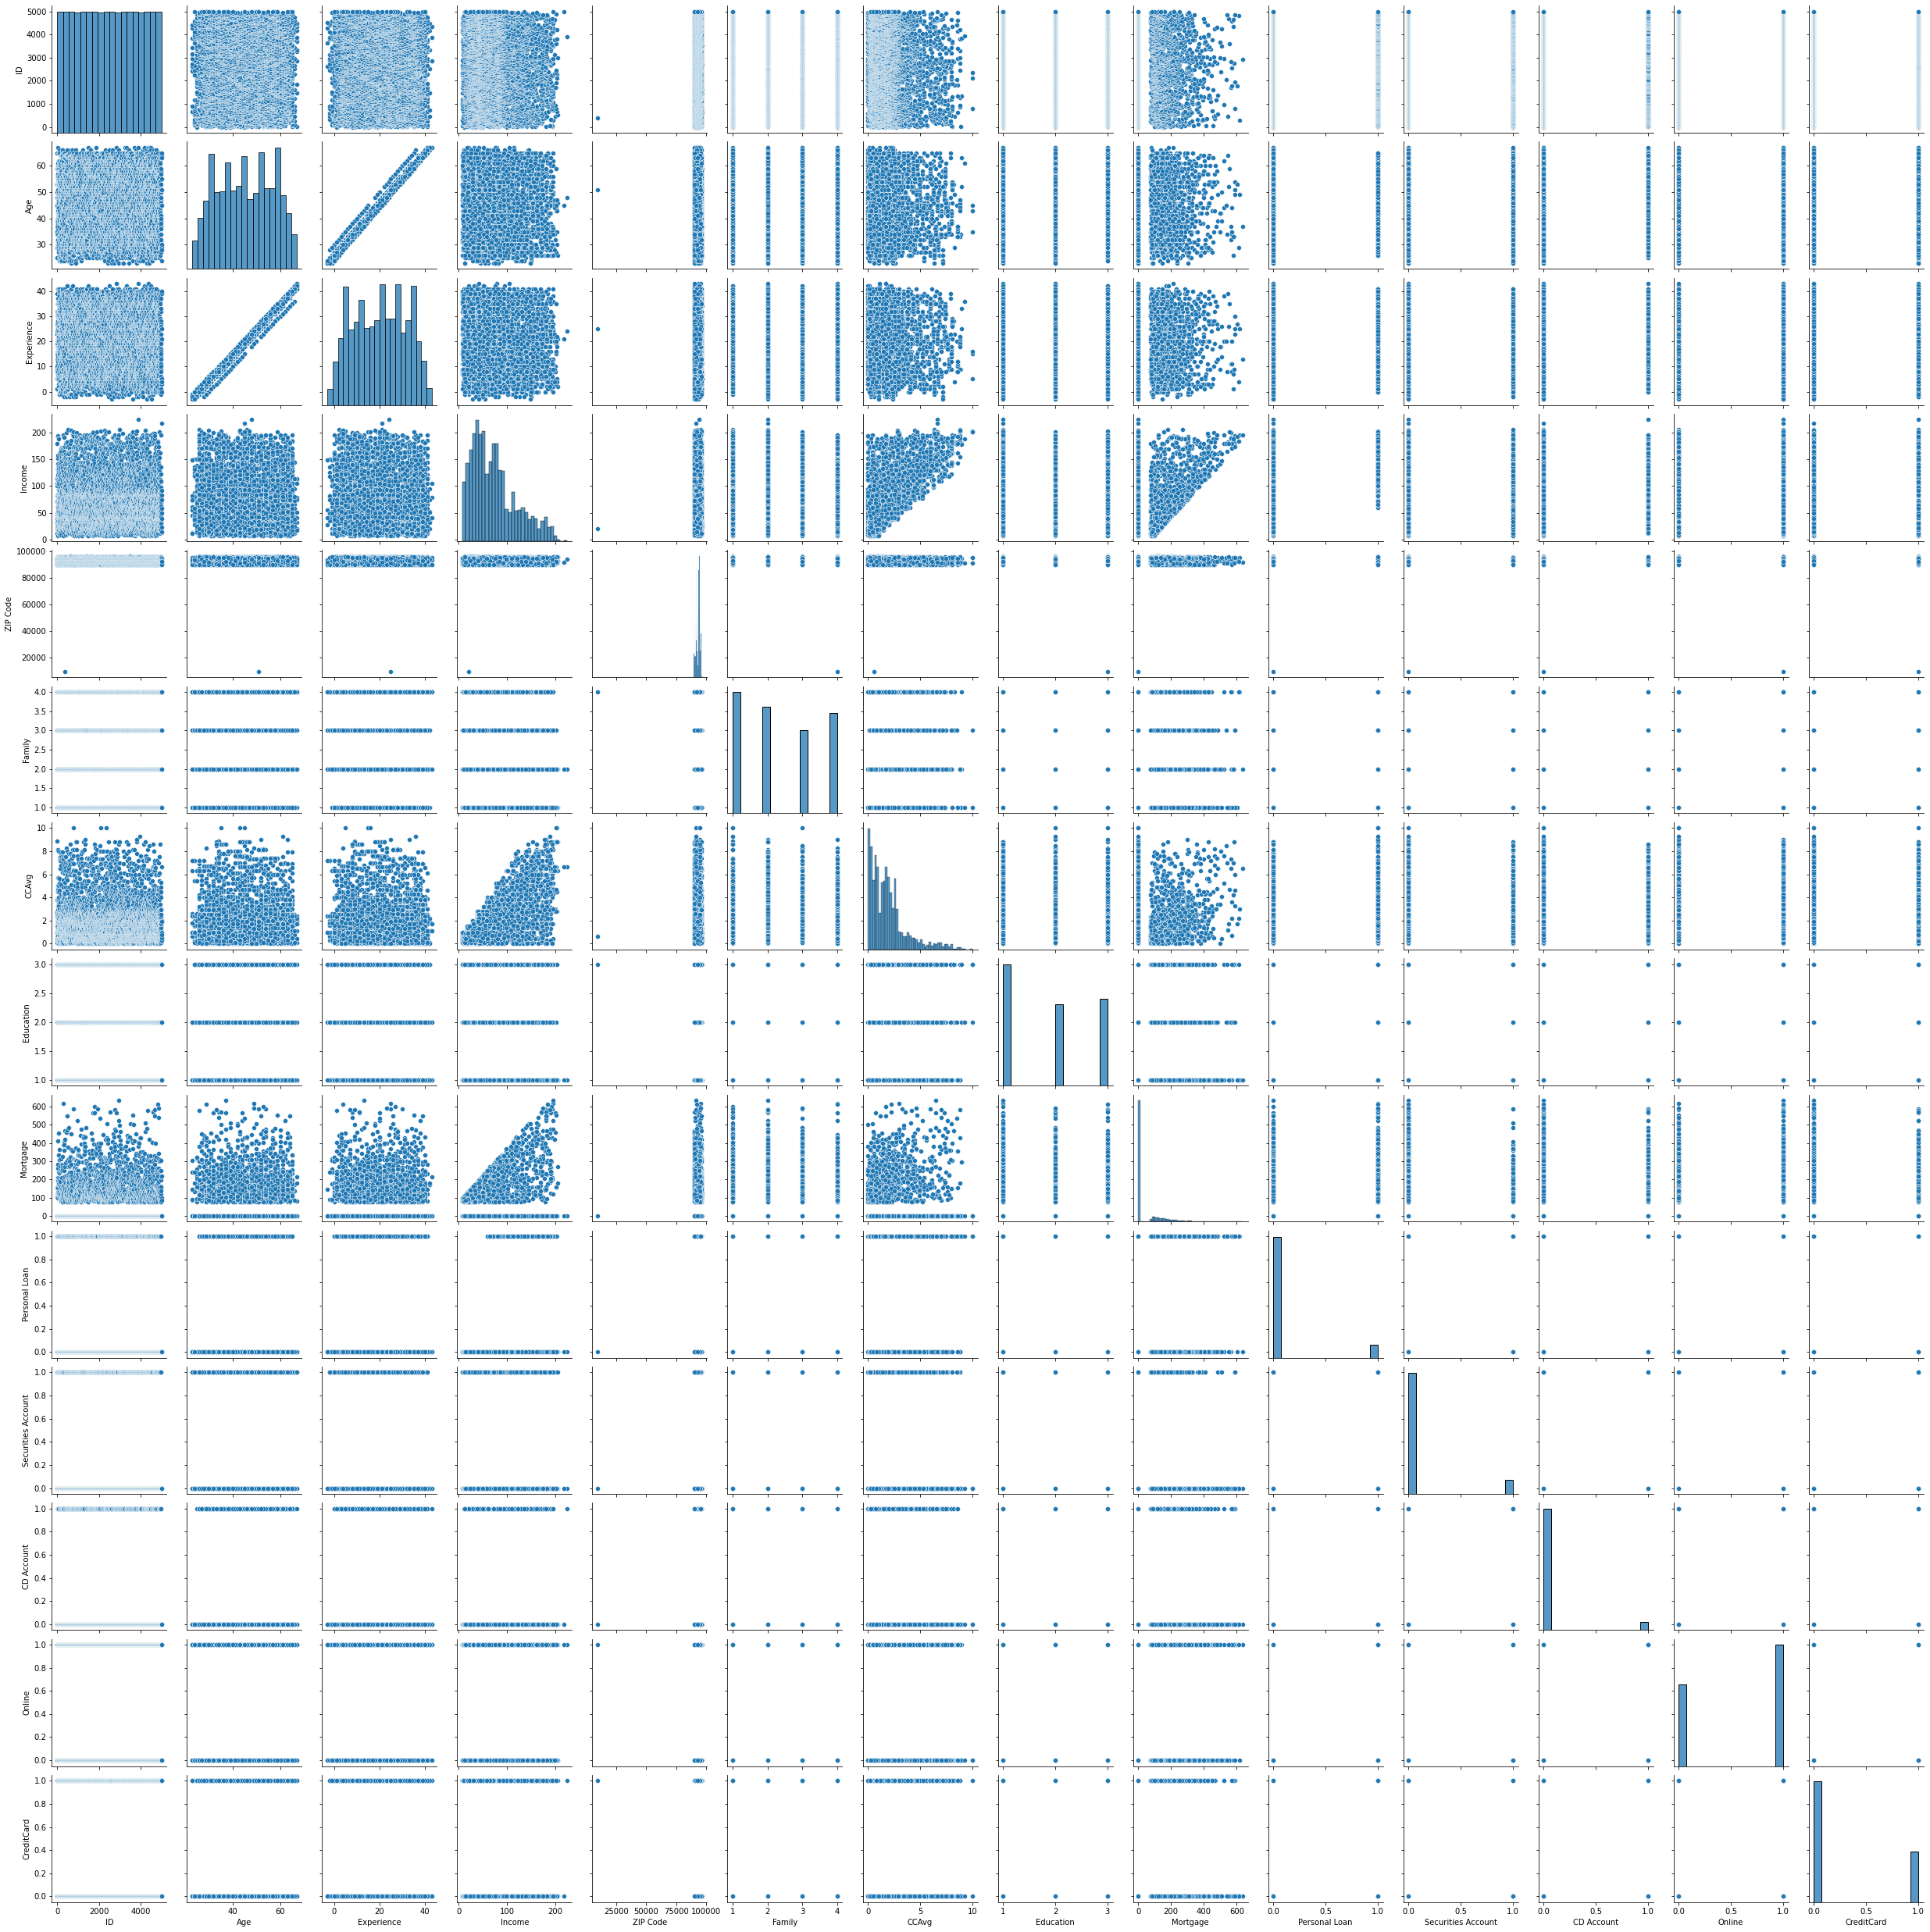

In [7]:
sns.pairplot(data)

In [8]:
data.Experience.describe()

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

####  There are negative values present in dataset as min value is negative -3.

In [9]:
# Total records of negative experience
data[data['Experience'] < 0]['Experience'].count()

52

#### It shows that there are 52 negative Value of expereince that we have to handle


#### Firstly we will replace negative values to null values

In [10]:
data['Experience'].replace( to_replace= -1,value = np.nan,inplace = True )
data['Experience'].replace( to_replace= -2,value = np.nan,inplace = True )
data['Experience'].replace( to_replace= -3,value = np.nan,inplace = True )

In [11]:
 #Now checking Total records of negative experience
data[data['Experience'] < 0]['Experience'].count()

0

####  Now there is no negative value in experience column

#### Now there are 52 null values in experience as we have replaced them so now we will replace them to median

In [12]:
data['Experience'].fillna(data['Experience'].median(),inplace=True)

In [13]:
#Quick overview of Experience column
data.Experience.describe()

count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [14]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

####   Now we can see that null values count is 0 in the dataframe.

In [15]:
 #Now again Total records of negative experience
data[data['Experience'] < 0]['Experience'].count()

0

####   Thus all the negative values are handled and converted into positive

In [16]:
data.describe().transpose()    #Look at the data distribution

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [17]:
data_temp=pd.DataFrame(data) #creating temporary data
data_temp

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3.0,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4.0,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39.0,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40.0,49,90034,3,0.5,2,0,0,0,0,1,0


# 2. Perform univariate analysis of each and every attribute - use an appropriate plot for a given attribute and mention your insights 


####   Continuous variable

In [18]:
data.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

####   On the basis of number of unique values we can separate the continuous and categorical data

In [19]:
categorical_variables=[col for col in data.columns if data[col].nunique()<=5]
print(categorical_variables)
continuous_variables=[col for col in data.columns if data[col].nunique()>5]
print(continuous_variables)

['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


In [20]:
categorical_variables.remove("Personal Loan")
print(categorical_variables)
continuous_variables.remove("ID")
print(continuous_variables)

['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


C:\Users\PRIYA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PRIYA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PRIYA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

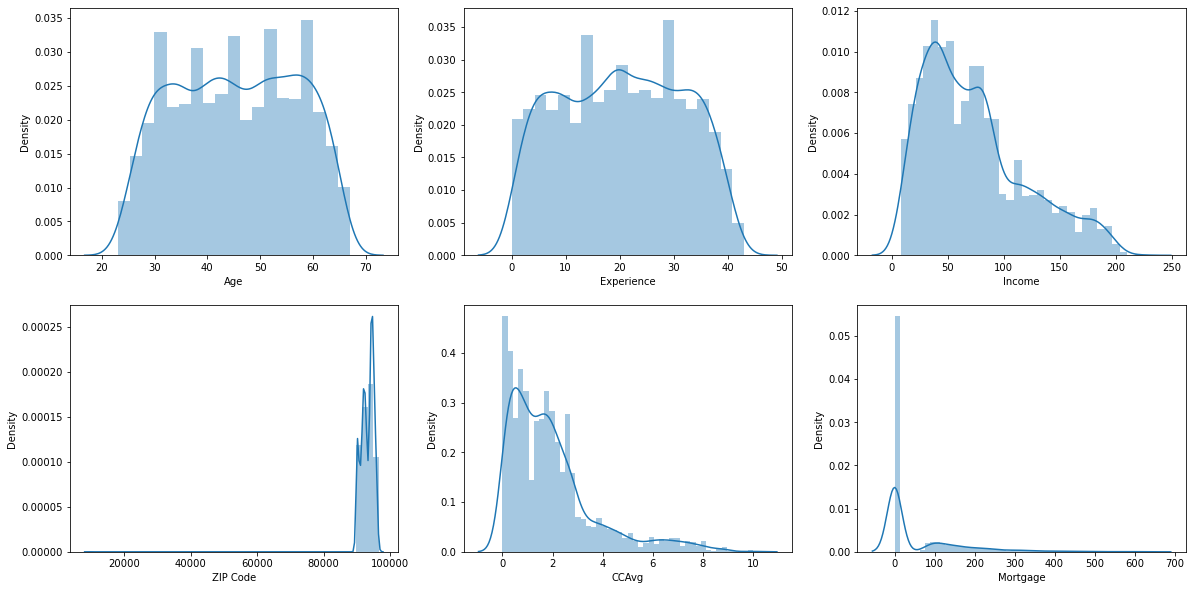

In [21]:
fig=plt.figure(figsize=(20,10))
#fig.subplots_adjust(wspace=0.4,hspace=0.4)
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.distplot(data[col])

####  We can see that Age and Experience are uniformaly distributed and show a good similarities in distribution.
#### Income, CCAvg, Mortgage are positive Skew
####  Most of the customer doesn't have Securities Account, CD Account and CreditCard
#### More number of customer use internet banking facilities.


# 3. Perform correlation analysis among all the variables - you can use Pairplot and Correlation coefficients of every attribute with every other attribute

In [22]:
cor=data.corr()
cor

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009339,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009339,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048718,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.017695,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.048718,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.014013,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


<AxesSubplot:title={'center':'Correlation of attributes'}>

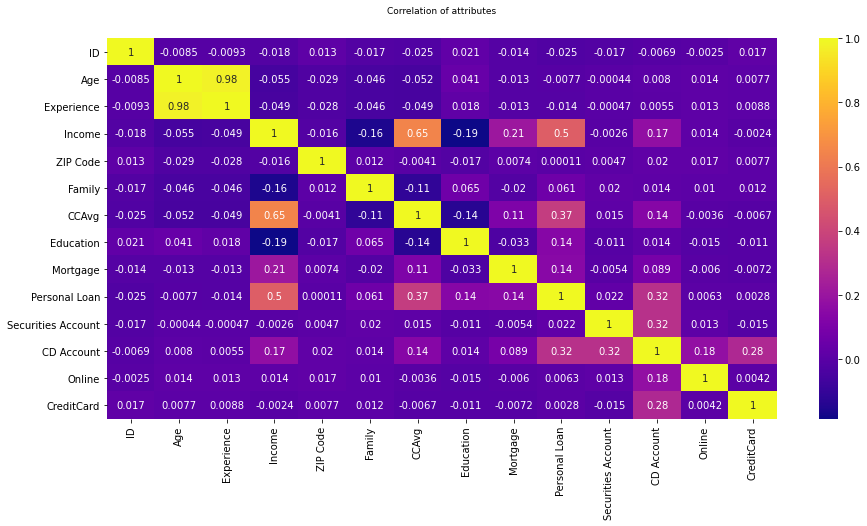

In [23]:
plt.figure(figsize=(15,7))
plt.title("Correlation of attributes",y=1.05,size=9)
sns.heatmap(data.corr(),cmap='plasma',annot=True)

####  Age and Experience are highly correlated and correlation of almost 1.
#### 'Income' and CCAvg are moderately correlated.


# 4. One hot encode the Education variable

In [24]:
#one hot encoding of coloumn B
one_hot=pd.get_dummies(data_temp['Education'])

#Drop column Education as it is now encoded
data_temp=data_temp.drop('Education',axis=1)

#join the encoded Dataset
data_temp=data_temp.join(one_hot)
data_temp

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,1,2,3
0,1,25,1.0,49,91107,4,1.6,0,0,1,0,0,0,1,0,0
1,2,45,19.0,34,90089,3,1.5,0,0,1,0,0,0,1,0,0
2,3,39,15.0,11,94720,1,1.0,0,0,0,0,0,0,1,0,0
3,4,35,9.0,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8.0,45,91330,4,1.0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3.0,40,92697,1,1.9,0,0,0,0,1,0,0,0,1
4996,4997,30,4.0,15,92037,4,0.4,85,0,0,0,1,0,1,0,0
4997,4998,63,39.0,24,93023,2,0.3,0,0,0,0,0,0,0,0,1
4998,4999,65,40.0,49,90034,3,0.5,0,0,0,0,1,0,0,1,0


####   One hot encoding allows the representation of categorical data to be more expressive

# 5. Separate the data into dependant and independent variables and create training and test sets out of them (X_train, y_train, X_test, y_test)


In [25]:
X=data_temp.drop('Personal Loan',axis=1)
y=data_temp['Personal Loan']

In [26]:
X_train,y_train,X_test,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=1)

In [27]:
X_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,1,2,3
1334,1335,47,22.0,35,94304,2,1.3,0,0,0,1,0,1,0,0
4768,4769,38,14.0,39,93118,1,2.0,0,0,0,1,0,0,1,0
65,66,59,35.0,131,91360,1,3.8,0,0,0,1,1,1,0,0
177,178,29,3.0,65,94132,4,1.8,244,0,0,0,0,0,1,0
4489,4490,39,13.0,21,95518,3,0.2,0,0,0,1,0,0,1,0


# 6. Use StandardScaler( ) from sklearn, to transform the training and test data into scaled values ( fit the StandardScaler object to the train data and transform train and test data using this object, making sure that the test set does not influence the values of the train set)

In [28]:
scaler=StandardScaler()

In [29]:
scaled_data=scaler.fit_transform(data.drop('Personal Loan',axis=1))

In [30]:
scaled_data=pd.DataFrame(scaled_data)

In [31]:
scaled_data.columns=data.drop('Personal Loan',axis=1).columns
scaled_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-1.731704,-1.774417,-1.717717,-0.538229,-0.964114,1.397414,-0.193385,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
1,-1.731012,-0.029524,-0.117989,-0.864109,-1.443932,0.525991,-0.250611,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
2,-1.730319,-0.552992,-0.473484,-1.363793,0.738814,-1.216855,-0.536736,-1.049078,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
3,-1.729626,-0.901970,-1.006727,0.569765,0.452243,-1.216855,0.436091,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
4,-1.728933,-0.901970,-1.095601,-0.625130,-0.859007,1.397414,-0.536736,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,1.549632


# 7. Write a function which takes a model, X_train, X_test, y_train and y_test as input and returns the accuracy, recall, precision, specificity, f1_score of the model trained on the train set and evaluated on the test set 
# 8. Employ multiple Classification models (Logistic, K-NN, Naïve Bayes etc) and use the function from step 7 to train and get the metrics of the model 

# 9. Create a dataframe with the columns - “Model”, “accuracy”, “recall”, “precision”, “specificity”, “f1_score”.Populate the dataframe accordingly

In [115]:
X=scaled_data
y=data['Personal Loan']

In [116]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

####  LogisticRegression

In [117]:
model_list.append('LogisticRegression')
lm=LogisticRegression()

In [118]:
lm.fit(x_train,y_train)
yhat_lm=lm.predict(x_test)

In [119]:
lm_score=f1_score(y_test,yhat_lm)
print("F1_score of LogisticRegression is")
lm_score

F1_score of LogisticRegression is


0.6692015209125476

In [120]:
lm_accuracy=accuracy_score(y_test,yhat_lm)
print("accuracy of LogisticRegression is")
lm_accuracy

accuracy of LogisticRegression is


0.942

In [121]:
lm_precision=precision_score(y_test,yhat_lm)
print("precision of LogisticRegression is")
lm_precision

precision of LogisticRegression is


0.8380952380952381

In [122]:
print(classification_report(y_test,yhat_lm))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1342
           1       0.84      0.56      0.67       158

    accuracy                           0.94      1500
   macro avg       0.89      0.77      0.82      1500
weighted avg       0.94      0.94      0.94      1500



In [123]:
print(confusion_matrix(y_test,yhat_lm))

[[1325   17]
 [  70   88]]


#### SVC

In [124]:
model_list.append('SVC')
svc=SVC()

In [125]:
svc.fit(x_train,y_train)
yhat_svc=svc.predict(x_test)

In [126]:
svc_score=f1_score(y_test,yhat_svc)
print("f1_score of SVC is")
svc_score

f1_score of SVC is


0.7927272727272728

In [127]:
svc_accuracy=accuracy_score(y_test,yhat_svc)
print("accuracy of SVC is")
svc_accuracy

accuracy of SVC is


0.962

In [128]:
svc_precision=precision_score(y_test,yhat_svc)
print("precision of SVC is")
svc_precision

precision of SVC is


0.9316239316239316

In [129]:
print(classification_report(y_test,yhat_svc))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1342
           1       0.93      0.69      0.79       158

    accuracy                           0.96      1500
   macro avg       0.95      0.84      0.89      1500
weighted avg       0.96      0.96      0.96      1500



In [130]:
print(confusion_matrix(y_test,yhat_svc))

[[1334    8]
 [  49  109]]


####   KNeighborsClassifier

In [131]:
model_list.append('KNeighborsClassifier')
neighbour=KNeighborsClassifier()

In [132]:
neighbour.fit(x_train,y_train)
yhat_neighbour=neighbour.predict(x_test)

In [133]:
neighbour_score=f1_score(y_test,yhat_neighbour)
print("f1_score of KNeighborsClassifier is")
neighbour_score

f1_score of KNeighborsClassifier is


0.6363636363636364

In [134]:
neighbour_accuracy=accuracy_score(y_test,yhat_neighbour)
print("accuracy of KNeighborsClassifier is")
neighbour_accuracy

accuracy of KNeighborsClassifier is


0.9413333333333334

In [135]:
neighbour_precision=precision_score(y_test,yhat_neighbour)
print("precision of KNeighborsClassifier is")
neighbour_precision

precision of KNeighborsClassifier is


0.9166666666666666

In [136]:
print(classification_report(y_test,yhat_neighbour))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1342
           1       0.92      0.49      0.64       158

    accuracy                           0.94      1500
   macro avg       0.93      0.74      0.80      1500
weighted avg       0.94      0.94      0.93      1500



In [137]:
print(confusion_matrix(y_test,yhat_neighbour))

[[1335    7]
 [  81   77]]


####   Among the 5 models that we have implemented DecisionTreeClassifier and RandomForestClassifier gives the same and 
####  best F1 Score and accuracy score with almost accuracy of 98% and F1-Score

####  Thus all the feature of every model is converted into a dataframe and are propogated.
####  It is clear seen that accuracy of RandonForestClassifier and DecisionTreeClassifier is more as compare to other models
####  Also precision of RandonForestClassifier is maximum 

# 10. Give your reasoning on which is the best model in this case

####  Among the 5 models that we have implemented DecisionTreeClassifier and RandomForestClassifier gives the same and best F1 Score and accuracy score with almost accuracy of 98% and F1-Score of 91%

####   From the accuracy scores , it seems like "KNN" algorithm have the highest accuracy and stability.
####   But we can use SVM also as all the Kernels have good accuracy as well.

####   The logistic Regression model is the best as the accuracy of the train and test set is almost similar and also the precision and recall accuracy is good. 

